# Geting Daily Data From Yahoo

In [5]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time

import tushare as ts
import time
import sys

import warnings
warnings.simplefilter("ignore")
import os
os.chdir(r'E:\SR\REITs')

% matplotlib inline

please install talib


[*********************100%***********************]  1 of 1 downloaded
Used 0.41 seconds.


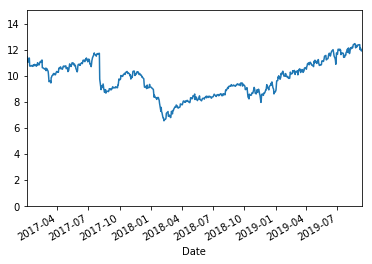

In [2]:
start_time = time.time()
data = yf.download('BRG', '2017-01-01', '2019-09-10', actions=True)
elapsed_time = time.time() - start_time
print("Used {0:.2f} seconds.".format(elapsed_time))

data['Adj Close'].plot(ylim=(0,15))

In [249]:
print("Used {0} seconds. {1}".format(elapsed_time, elapsed_time))

Used 0.4041099548339844 seconds. 0.4041099548339844


In [200]:
data.reset_index().to_excel(r'BRG.xlsx', index=False)

In [81]:
REITs = ['EQR','MAA','ESS','AVB','CPT','UDR','AIV','BRG']

startDate = '2006-01-01'
endDate = '2019-09-10'

EQR = yf.download('EQR', startDate, endDate)
MAA = yf.download('MAA', startDate, endDate)
ESS = yf.download('ESS', startDate, endDate)
AVB = yf.download('AVB', startDate, endDate)
CPT = yf.download('CPT', startDate, endDate)
UDR = yf.download('UDR', startDate, endDate)
AIV = yf.download('AIV', startDate, endDate)
BRG = yf.download('BRG', startDate, endDate)
SP500 = yf.download('^GSPC', startDate, endDate)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [82]:
Merged = pd.DataFrame({'SP500':SP500['Adj Close'],'EQR':EQR['Adj Close'], 'MAA':MAA['Adj Close'],
                      'ESS':ESS['Adj Close'], 'AVB':AVB['Adj Close'],
                      'CPT':CPT['Adj Close'], 'UDR':UDR['Adj Close'],
                      'AIV':AIV['Adj Close'], 'BRG':BRG['Adj Close']
                      })

In [83]:
Merged.head()

,AIV,AVB,BRG,CPT,EQR,ESS,MAA,SP500,UDR
Date,,,,,,,,,
2006-01-03,22.65,56.15,NaN,31.47,20.77,59.78,27.19,1268.80,13.20
2006-01-04,22.86,56.77,NaN,31.77,20.84,60.24,26.88,1273.46,13.20
2006-01-05,23.24,57.60,NaN,32.15,20.88,60.78,27.13,1273.48,13.35
2006-01-06,23.53,58.69,NaN,32.85,21.24,60.78,27.42,1285.45,13.52
2006-01-09,23.78,59.45,NaN,33.59,21.44,61.02,27.46,1290.15,13.62


In [84]:
Merged1 = Merged.divide(Merged.iloc[0]/100)

In [85]:
Merged1.tail()

,AIV,AVB,BRG,CPT,EQR,ESS,MAA,SP500,UDR
Date,,,,,,,,,
2019-09-03,226.534216,381.282280,NaN,345.916746,413.047665,539.678822,470.319971,229.056589,367.424242
2019-09-04,227.019868,384.968833,NaN,349.412139,415.454983,544.345935,472.784112,231.540038,368.939394
2019-09-05,225.474614,382.386465,NaN,347.950429,414.010592,543.191703,472.048547,234.552333,366.287879
2019-09-06,228.697572,384.238646,NaN,352.557992,418.151180,547.106056,473.777124,234.765921,370.681818
2019-09-09,227.373068,380.908281,NaN,350.619638,409.773712,544.780863,472.526664,234.743852,366.893939


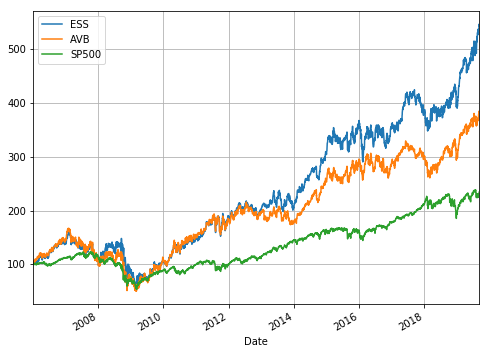

In [87]:
Merged1[['ESS','AVB','SP500']].plot(figsize=(8,6), grid = True)

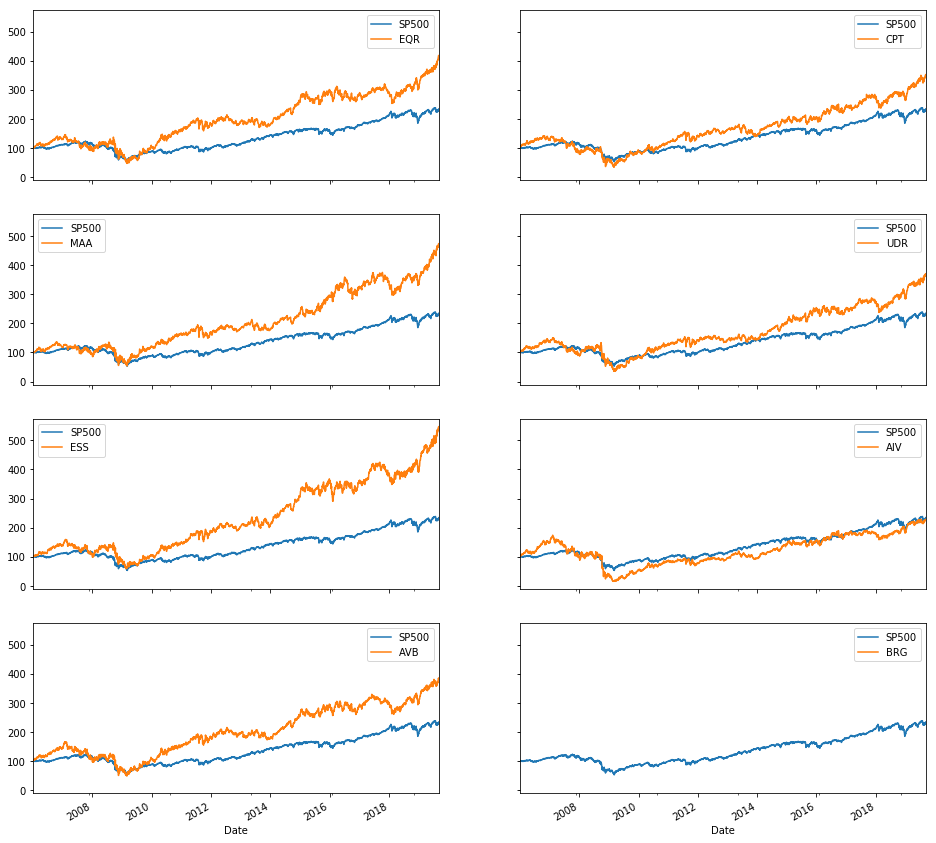

In [88]:
fig, axs = plt.subplots(4, 2, figsize=(16,16), sharex=True, sharey=True)
#fig.suptitle('Horizontally stacked subplots')

for i in range(len(REITs)):
    reit = REITs[i]
    column = int(np.floor(i/4))
    row = i - column * 4
    #print(row, column)
    Merged1[['SP500', reit]].plot(ax = axs[row, column])

# Combine tickers from Robinson's youtube video and the above list

In [180]:
import copy

KennyRobinsonDict = {'LAMR':'Ad Sign','LTC':'Long Term Care','ESS':'High End Apartments',
                     'O':'Conservative, High occupation','SUI':'Land of mobile homes',
                    'PSA':'Public Storage','LAND':'Farm land with water',
                     'VNQ':'REIT ETF', 'REET':'REIT ETF',
                     'EQR':'Residential apartments','MAA':'Mid-America Apartment',
                    '^GSPC':'SP500'}

dict_of_Series = {}

startDate = '2006-01-01'
endDate = '2019-09-10'


for reit in list(KennyRobinsonDict.keys()):
    SeriesName = str(reit)
    SeriesValue = yf.download(reit, startDate, endDate)['Adj Close']
    
    dict_of_Series[SeriesName] = copy.deepcopy(SeriesValue)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [181]:
Rst = pd.DataFrame(dict_of_Series)

In [182]:
Rst.head()

,EQR,ESS,LAMR,LAND,LTC,MAA,O,PSA,REET,SUI,VNQ,^GSPC
Date,,,,,,,,,,,,
2006-01-03,20.77,59.78,33.61,NaN,10.07,27.19,10.80,45.70,NaN,11.85,33.66,1268.80
2006-01-04,20.84,60.24,33.67,NaN,10.05,26.88,10.77,45.88,NaN,11.77,33.91,1273.46
2006-01-05,20.88,60.78,33.77,NaN,10.15,27.13,10.98,46.67,NaN,11.83,34.17,1273.48
2006-01-06,21.24,60.78,33.97,NaN,10.18,27.42,10.92,46.99,NaN,11.98,34.49,1285.45
2006-01-09,21.44,61.02,34.07,NaN,10.23,27.46,11.16,47.54,NaN,12.11,34.79,1290.15


In [183]:
Rst = Rst.rename(columns = {'^GSPC':'SP500'})

In [184]:
Rst1 = Rst.divide(Rst.iloc[-1]/100)
Rst1.tail()

,EQR,ESS,LAMR,LAND,LTC,MAA,O,PSA,REET,SUI,VNQ,SP500
Date,,,,,,,,,,,,
2019-09-03,100.798966,99.063469,99.332985,95.920067,98.589871,99.533001,100.279070,102.880578,98.927039,104.046162,100.150538,97.577247
2019-09-04,101.386441,99.920165,100.078472,96.752706,98.788481,100.054483,101.647841,103.634080,99.892704,104.762236,100.989247,98.635187
2019-09-05,101.033956,99.708294,99.803819,96.835970,98.609732,99.898817,99.667774,101.353950,99.606581,103.093715,100.258065,99.918413
2019-09-06,102.044413,100.426812,99.777662,97.502082,99.185700,100.264633,100.930233,101.055689,99.928469,103.941880,100.483871,100.009401
2019-09-09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


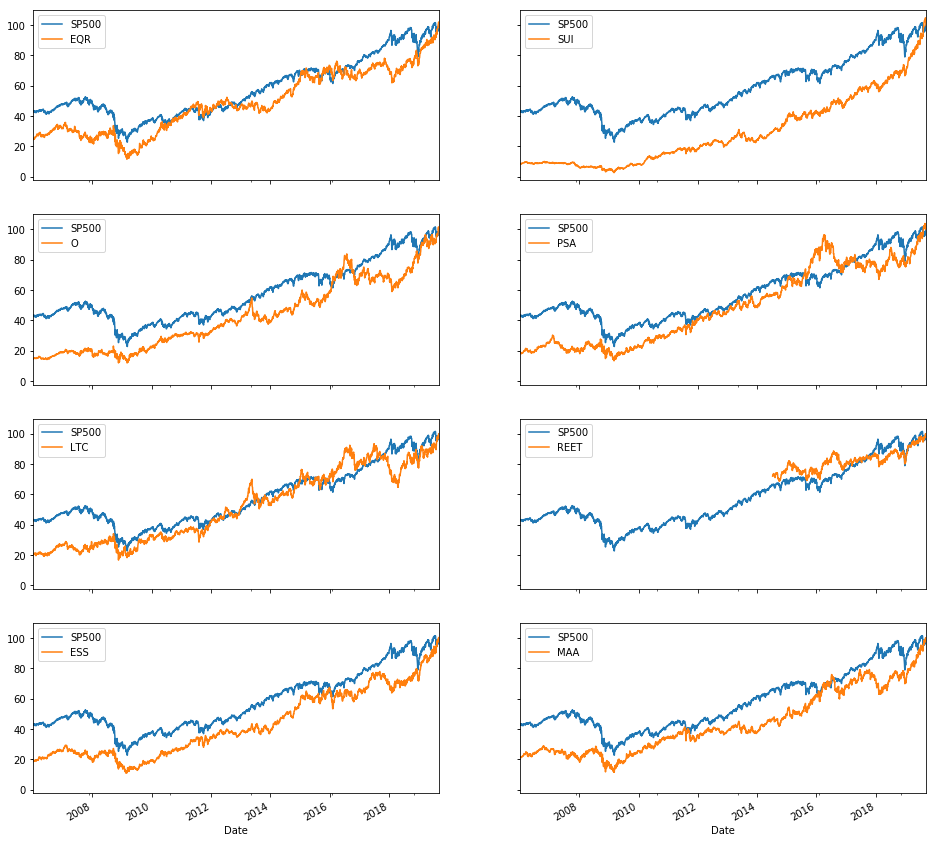

In [185]:
REITs = list(KennyRobinsonDict.keys())
REITs.remove('^GSPC')
REITs.remove('VNQ')
REITs.remove('LAND')
REITs.remove('LAMR')

NumberOfTickers = len(REITs)
rows =math.ceil(NumberOfTickers / 2)

fig, axs = plt.subplots(rows, 2, figsize=(16,16), sharex=True, sharey=True)
#fig.suptitle('Overall')

for i in range(len(REITs)):
    reit = REITs[i]
    column = int(np.floor(i/rows))
    row = i - column * rows
    #print(row, column)
    Rst1[['SP500', reit]].plot(ax = axs[row, column])


## Watch closely

In [209]:
REITs.remove('REET')
REITs.remove('EQR')

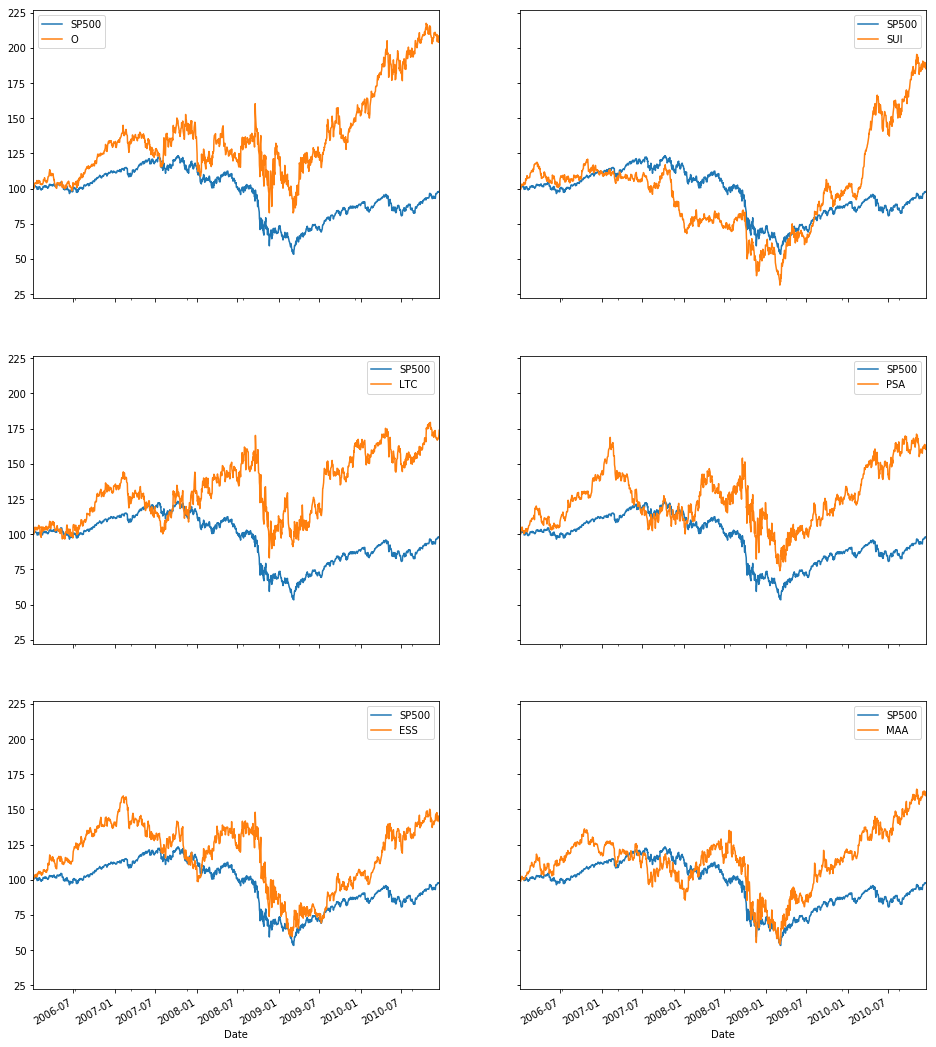

In [210]:
Rst2 = Rst.iloc[0:1250]
Rst2 = Rst2.divide(Rst2.iloc[0]/100)

NumberOfTickers = len(REITs)
rows =math.ceil(NumberOfTickers / 2)

fig, axs = plt.subplots(rows, 2, figsize=(16,20), sharex=True, sharey=True)
#fig.suptitle('Horizontally stacked subplots')

for i in range(len(REITs)):
    reit = REITs[i]
    column = int(np.floor(i/rows))
    row = i - column * rows
    #print(row, column)
    Rst2[['SP500', reit]].plot(ax = axs[row, column])

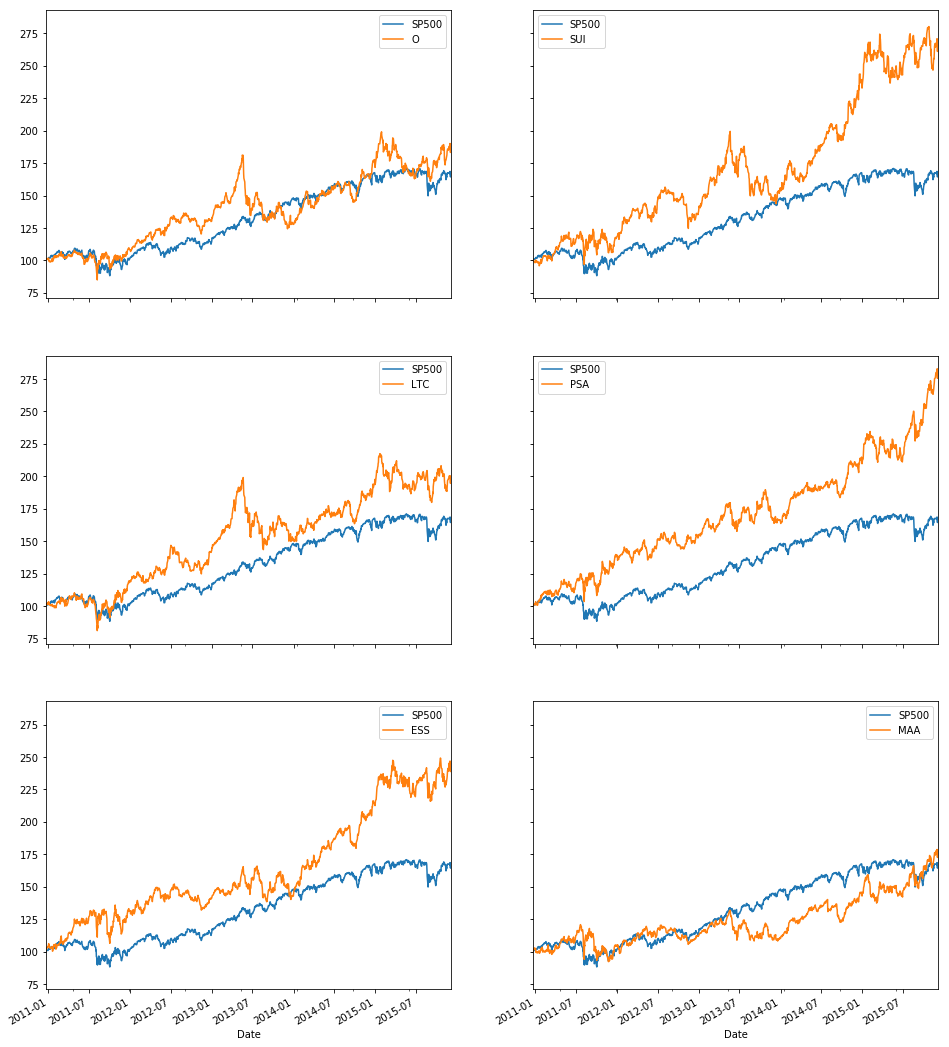

In [211]:
Rst2 = Rst.iloc[1250:2500]
Rst2 = Rst2.divide(Rst2.iloc[0]/100)

NumberOfTickers = len(REITs)
rows =math.ceil(NumberOfTickers / 2)

fig, axs = plt.subplots(rows, 2, figsize=(16,20), sharex=True, sharey=True)
#fig.suptitle('Horizontally stacked subplots')

for i in range(len(REITs)):
    reit = REITs[i]
    column = int(np.floor(i/rows))
    row = i - column * rows
    #print(row, column)
    Rst2[['SP500', reit]].plot(ax = axs[row, column])

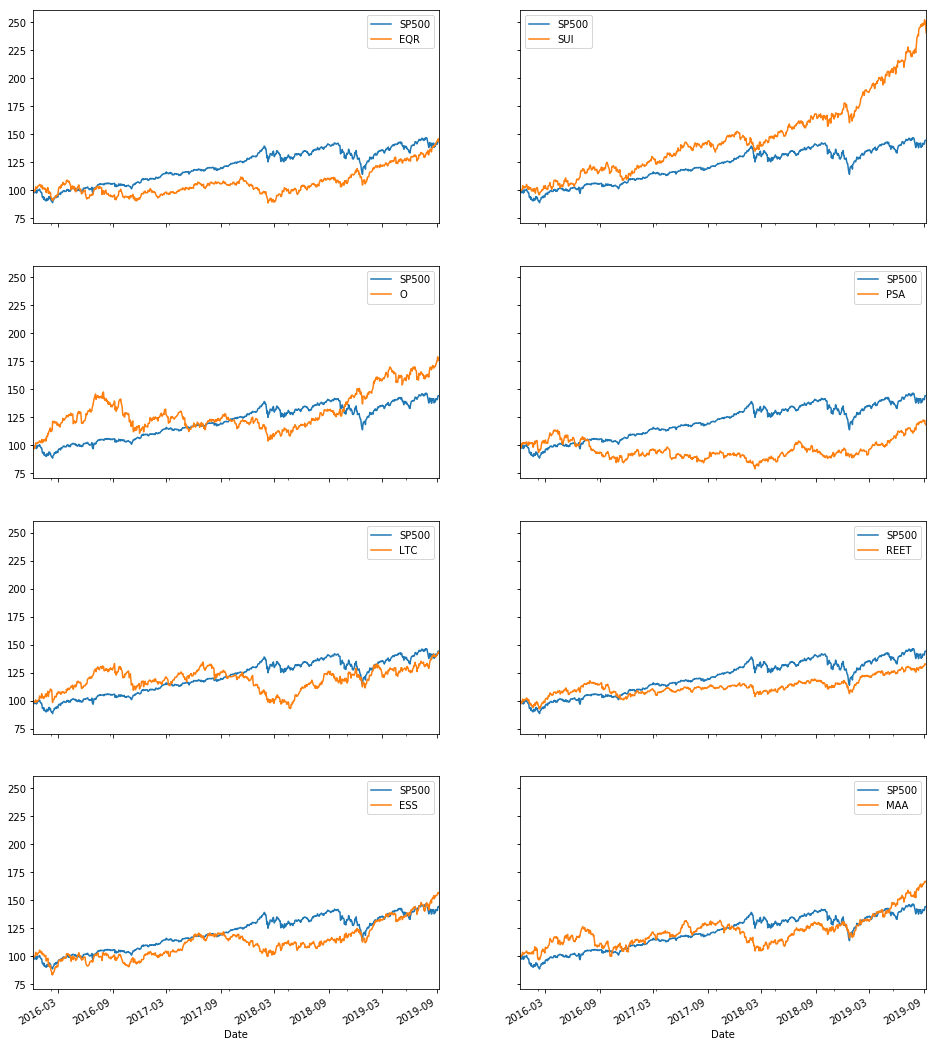

In [215]:
Rst2 = Rst.iloc[2500:3500]
Rst2 = Rst2.divide(Rst2.iloc[0]/100)


REITs = list(KennyRobinsonDict.keys())
REITs.remove('^GSPC')
REITs.remove('VNQ')
REITs.remove('LAND')
REITs.remove('LAMR')


NumberOfTickers = len(REITs)
rows =math.ceil(NumberOfTickers / 2)

fig, axs = plt.subplots(rows, 2, figsize=(16,20), sharex=True, sharey=True)
#fig.suptitle('Horizontally stacked subplots')

for i in range(len(REITs)):
    reit = REITs[i]
    column = int(np.floor(i/rows))
    row = i - column * rows
    #print(row, column)
    Rst2[['SP500', reit]].plot(ax = axs[row, column])

In [208]:
len(Rst)

3444

In [238]:
Rst.head()

,EQR,ESS,LAMR,LAND,LTC,MAA,O,PSA,REET,SUI,VNQ,SP500
Date,,,,,,,,,,,,
2006-01-03,20.77,59.78,33.61,NaN,10.07,27.19,10.80,45.70,NaN,11.85,33.66,1268.80
2006-01-04,20.84,60.24,33.67,NaN,10.05,26.88,10.77,45.88,NaN,11.77,33.91,1273.46
2006-01-05,20.88,60.78,33.77,NaN,10.15,27.13,10.98,46.67,NaN,11.83,34.17,1273.48
2006-01-06,21.24,60.78,33.97,NaN,10.18,27.42,10.92,46.99,NaN,11.98,34.49,1285.45
2006-01-09,21.44,61.02,34.07,NaN,10.23,27.46,11.16,47.54,NaN,12.11,34.79,1290.15


In [239]:
Rst.tail()

,EQR,ESS,LAMR,LAND,LTC,MAA,O,PSA,REET,SUI,VNQ,SP500
Date,,,,,,,,,,,,
2019-09-03,85.79,322.62,75.95,11.52,49.64,127.88,75.46,262.15,27.66,149.66,93.14,2906.27
2019-09-04,86.29,325.41,76.52,11.62,49.74,128.55,76.49,264.07,27.93,150.69,93.92,2937.78
2019-09-05,85.99,324.72,76.31,11.63,49.65,128.35,75.00,258.26,27.85,148.29,93.24,2976.00
2019-09-06,86.85,327.06,76.29,11.71,49.94,128.82,75.95,257.50,27.94,149.51,93.45,2978.71
2019-09-09,85.11,325.67,76.46,12.01,50.35,128.48,75.25,254.81,27.96,143.84,93.00,2978.43


In [227]:
RstX = copy.deepcopy(Rst)

In [228]:
RstX.reset_index(inplace=True, drop=False)

In [240]:
RstX.head()

,Date,EQR,ESS,LAMR,LAND,LTC,MAA,O,PSA,REET,SUI,VNQ,SP500,SP500_Pre
0,2006-01-03,20.77,59.78,33.61,NaN,10.07,27.19,10.80,45.70,NaN,11.85,33.66,1268.80,NaN
1,2006-01-04,20.84,60.24,33.67,NaN,10.05,26.88,10.77,45.88,NaN,11.77,33.91,1273.46,1268.80
2,2006-01-05,20.88,60.78,33.77,NaN,10.15,27.13,10.98,46.67,NaN,11.83,34.17,1273.48,1273.46
3,2006-01-06,21.24,60.78,33.97,NaN,10.18,27.42,10.92,46.99,NaN,11.98,34.49,1285.45,1273.48
4,2006-01-09,21.44,61.02,34.07,NaN,10.23,27.46,11.16,47.54,NaN,12.11,34.79,1290.15,1285.45


In [235]:
RstX['SP500_Pre'] = np.NaN
RstX['SP500_Pre'][1:] = RstX['SP500'][0:-1]

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [243]:
#RstX['SP500_Pre'] = np.NaN
RstX['Drop'] = (RstX['SP500']/ RstX['SP500_Pre'] -1 ) * 100

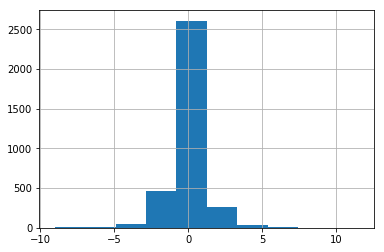

In [244]:
RstX['Drop'].hist()

In [245]:
RstX[RstX['Drop'] < -5]

,Date,EQR,ESS,LAMR,LAND,LTC,MAA,O,PSA,REET,SUI,VNQ,SP500,SP500_Pre,Drop
689,2008-09-29,24.25,77.04,22.73,NaN,15.21,30.12,14.21,64.63,NaN,9.13,35.58,1106.42,1213.27,-8.806778
695,2008-10-07,21.40,72.65,19.70,NaN,13.75,25.21,12.59,54.25,NaN,7.67,29.54,996.23,1056.89,-5.739481
697,2008-10-09,19.50,67.11,19.76,NaN,12.33,23.20,11.72,49.26,NaN,6.08,26.82,909.92,984.94,-7.616708
701,2008-10-15,17.69,60.31,14.07,NaN,12.36,25.03,12.18,52.07,NaN,6.45,25.39,907.84,998.01,-9.034980
706,2008-10-22,17.51,60.20,12.29,NaN,12.12,24.12,11.85,49.68,NaN,7.15,24.03,896.78,955.05,-6.101251
716,2008-11-05,18.34,54.80,11.73,NaN,12.02,21.15,12.02,53.21,NaN,6.94,23.98,952.77,1005.75,-5.267711
717,2008-11-06,17.42,54.16,11.20,NaN,11.67,20.35,11.66,50.04,NaN,6.66,22.86,904.88,952.77,-5.026397
721,2008-11-12,17.03,51.43,9.65,NaN,10.61,19.30,11.05,45.94,NaN,5.80,20.26,852.30,898.95,-5.189388
726,2008-11-19,13.56,44.25,9.00,NaN,8.44,16.87,9.39,40.16,NaN,4.93,16.49,806.58,859.12,-6.115560
727,2008-11-20,12.93,46.19,7.96,NaN,8.37,15.06,8.94,37.61,NaN,4.82,15.19,752.44,806.58,-6.712291


## Draw Price and Volume

In [100]:
import warnings
warnings.simplefilter("ignore")

import yfinance as yf 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import os
os.chdir(r'E:\SR\REITs')

% matplotlib inline

In [16]:
def drawCurveAndBar(Rst):
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Rst['Date'], Rst['Adj Close'])
    ax1.set_ylabel('Adj Close', fontsize = 12)
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.bar(Rst['Date'], Rst['Volume'], color = 'grey', alpha = 0.5, width =0.5)

    ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel('Volume', fontsize = 12)

[*********************100%***********************]  1 of 1 downloaded


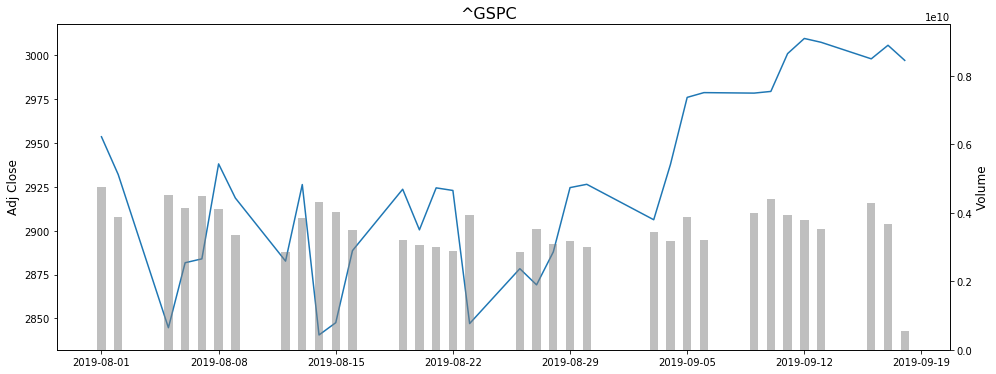

In [102]:
ticker = '^GSPC'
data = yf.download(ticker, '2019-08-01','2019-09-20')
data.reset_index(inplace=True, drop=False)
drawCurveAndBar(data)

[*********************100%***********************]  1 of 1 downloaded


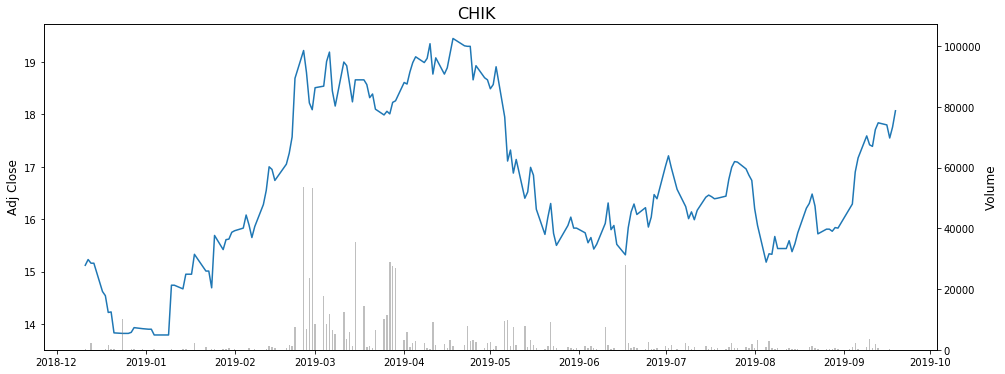

In [17]:
ticker = 'CHIK'
data = yf.download(ticker, '2011-01-01','2019-09-20')
data.reset_index(inplace=True, drop=False)
drawCurveAndBar(data)

# Minute Data

In [11]:
def drawCurveAndBar(Rst):
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Rst['Datetime'], Rst['Adj Close'])
    ax1.set_ylabel('Adj Close', fontsize = 12)
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.bar(Rst['Datetime'], Rst['Volume'], color = 'grey', alpha = 0.5, width =0.01)

    ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel('Volume', fontsize = 12)

In [14]:
ticker = 'CHIK'
data = yf.download(ticker, '2019-09-15','2019-09-19', interval='1m')
data.reset_index(inplace=True, drop=False)
data.head()

[*********************100%***********************]  1 of 1 downloaded


Exception in thread Thread-17:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\yfinance\__init__.py", line 363, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "C:\Anaconda\lib\site-packages\yfinance\__init__.py", line 208, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "C:\Anaconda\lib\threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Anaconda\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Anaconda\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "C:\Anaconda\lib\site-packages\yfinance\__init__.py", line 550, in _download_

,Date,Adj Close,Close,High,Low,Open,Volume


In [149]:
data.tail(20)

,Datetime,Adj Close,Close,High,Low,Open,Volume
1921,2019-09-17 15:40:00-04:00,41.24,41.24,41.24,41.21,41.22,348083
1922,2019-09-17 15:41:00-04:00,41.24,41.24,41.24,41.23,41.24,35852
1923,2019-09-17 15:42:00-04:00,41.24,41.24,41.24,41.23,41.23,38793
1924,2019-09-17 15:43:00-04:00,41.22,41.22,41.24,41.21,41.24,178969
1925,2019-09-17 15:44:00-04:00,41.22,41.22,41.22,41.22,41.22,19070
1926,2019-09-17 15:45:00-04:00,41.21,41.21,41.23,41.21,41.22,96819
1927,2019-09-17 15:46:00-04:00,41.22,41.22,41.22,41.21,41.22,16360
1928,2019-09-17 15:47:00-04:00,41.22,41.22,41.23,41.22,41.22,43361
1929,2019-09-17 15:48:00-04:00,41.22,41.22,41.23,41.22,41.23,27483
1930,2019-09-17 15:49:00-04:00,41.23,41.23,41.25,41.22,41.22,474350


[*********************100%***********************]  1 of 1 downloaded


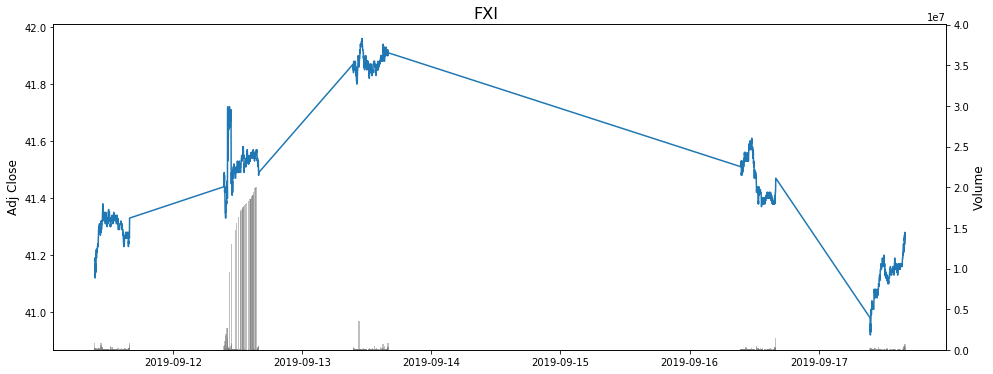

In [117]:
ticker = 'FXI'
data = yf.download(ticker, '2019-09-11','2019-09-18', interval = '1m')
data.reset_index(inplace=True, drop=False)
drawCurveAndBar(data)

[*********************100%***********************]  1 of 1 downloaded


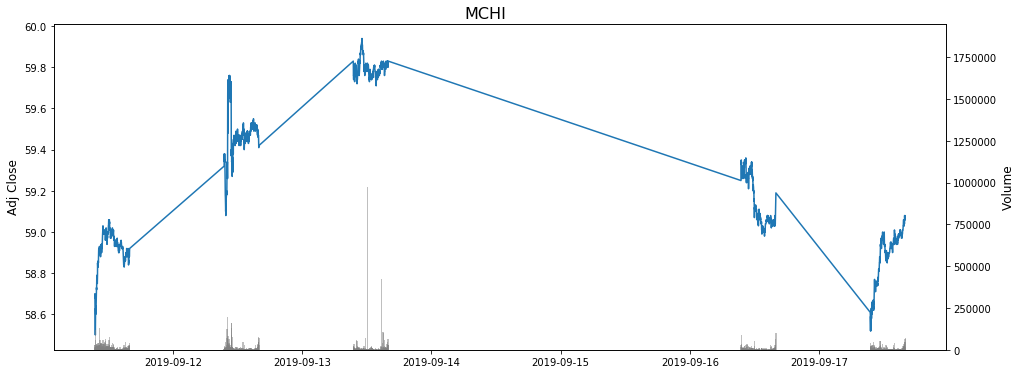

In [120]:
ticker = 'MCHI'
data = yf.download(ticker, '2019-09-11','2019-09-18', interval = '1m')
data.reset_index(inplace=True, drop=False)
drawCurveAndBar(data)

# 沪深股市数据

In [36]:
import tushare as ts
import time
import sys

please install talib


In [150]:
code =  'sh'
hs = ts.get_hist_data(code, start='2017-01-01', end='2019-09-31')
hs = hs.sort_index()
hs.reset_index(inplace=True, drop=False)
hs['date'] = pd.to_datetime(hs['date'])

In [151]:
hs.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2017-03-20,3241.11,3251.13,3250.81,3228.12,1705484.25,13.36,0.41,3250.810,3250.810,3250.810,1705484.25,1705484.25,1705484.25
1,2017-03-21,3250.25,3262.22,3261.61,3246.70,1627193.00,10.80,0.33,3256.210,3256.210,3256.210,1666338.63,1666338.63,1666338.63
2,2017-03-22,3246.22,3255.78,3245.22,3229.13,1897316.50,-16.39,-0.50,3252.547,3252.547,3252.547,1743331.25,1743331.25,1743331.25
3,2017-03-23,3245.81,3262.09,3248.55,3221.93,1930291.50,3.33,0.10,3251.548,3251.548,3251.548,1790071.31,1790071.31,1790071.31
4,2017-03-24,3247.35,3275.21,3269.45,3241.12,2197779.25,20.90,0.64,3255.128,3255.128,3255.128,1871612.90,1871612.90,1871612.90


In [152]:
def drawHS(Rst):
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(code, fontsize=16, y = 0.92)
    
    ax1.plot(Rst['date'], Rst['close'])
    ax1.set_ylabel('close', fontsize = 12)
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.bar(Rst['date'], Rst['volume'], color = 'grey', alpha = 0.5, width =0.5)

    ax2.set_ylim([0, Rst['volume'].max()*2])
    ax2.set_ylabel('Volume', fontsize = 12)

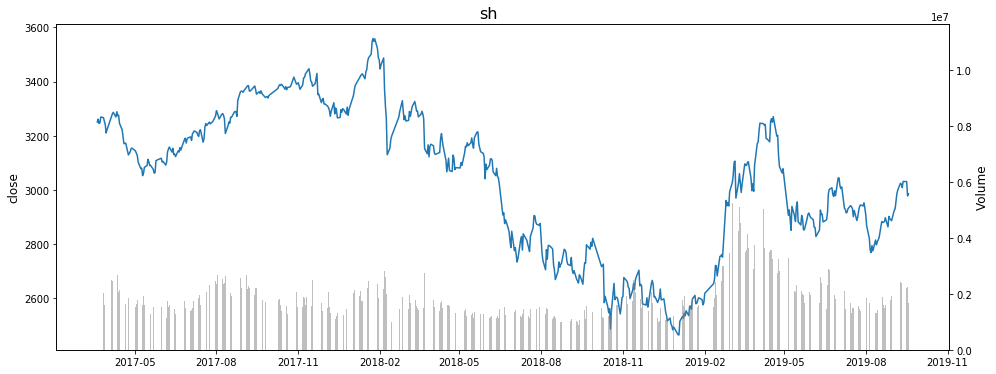

In [153]:
drawHS(hs)

In [145]:
start = len(hs) -80
step = 5
hs.loc[start:(start+ step)]

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
95,2019-05-28,2890.27,2924.04,2909.91,2887.08,2233105.50,17.53,0.61,2879.900,2895.276,2924.205,1969208.30,2150670.66,2330234.83
96,2019-05-29,2894.83,2934.98,2914.70,2890.66,1989588.25,4.79,0.17,2884.500,2892.878,2915.620,1967072.15,2119109.79,2289277.31
97,2019-05-30,2903.42,2907.85,2905.81,2881.38,2057587.88,-8.89,-0.30,2895.158,2887.888,2907.785,1983909.10,2076482.88,2246099.27
98,2019-05-31,2904.50,2922.91,2898.70,2895.58,1952305.75,-7.11,-0.24,2904.300,2889.528,2898.803,2039959.28,2005411.80,2232563.29
99,2019-06-03,2901.74,2920.83,2890.08,2875.90,2159435.50,-8.62,-0.30,2903.840,2891.476,2897.984,2078404.58,2011882.91,2177048.93
100,2019-06-04,2887.64,2888.39,2862.28,2851.97,1884635.38,-27.80,-0.96,2894.314,2887.107,2894.779,2008710.55,1988959.43,2144639.81


# Compare Sp500 vs SH and a specific stocks

In [24]:
# define the functions

def getUsStock(US_Stock, start, end):
    sp500 = yf.download('^GSPC', start, end)
    sp500.reset_index(inplace=True, drop=False)
    sp500 = sp500.rename(columns = {'Adj Close':'Sp500'})
    
    UsStock = yf.download(US_Stock, start, end)
    UsStock.reset_index(inplace=True, drop=False)
    UsStock = UsStock.rename(columns = {'Adj Close':US_Stock})
    
    US = pd.merge(sp500[['Date','Sp500']], UsStock[['Date',US_Stock]], on = 'Date', how = 'left')
    
    return US

def getCnStock(CN_Stock, start, end):
    
    hs = ts.get_hist_data('sh', start=start, end = end)
    hs = hs.sort_index()
    hs.reset_index(inplace=True, drop=False)
    hs['date'] = pd.to_datetime(hs['date'])
    hs = hs.rename(columns = {'close':'Sh50', 'date':'Date'})

    CnStock = ts.get_hist_data(CN_Stock, start=start, end = end)
    CnStock = CnStock.sort_index()
    CnStock.reset_index(inplace=True, drop=False)
    CnStock['date'] = pd.to_datetime(CnStock['date'])
    CnStock = CnStock.rename(columns = {'close':CN_Stock, 'date':'Date'})
   
    CN = pd.merge(hs[['Date','Sh50']], CnStock[['Date',CN_Stock]], on = 'Date', how = 'left')
    
    return CN

def drawUsCnStocks(Merged, ticker):
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.plot(Merged['Date'], Merged['Sh50'])
    ax1.set_ylabel('SP500 & SSEC', fontsize = 12)
    plt.legend(loc = 'upper left')
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel( ticker, fontsize = 12)
    plt.legend()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


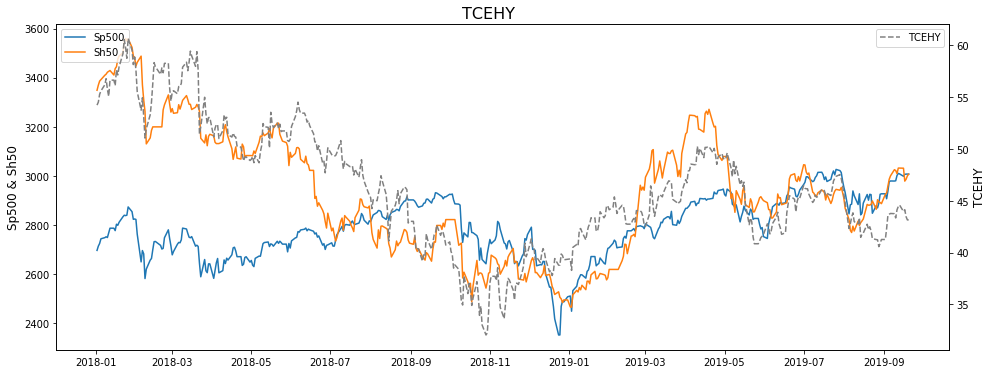

In [21]:
US_Stock = 'TCEHY'
CN_Stock = 'sh'

start = '2018-01-01'
end = '2019-09-20'

US = getUsStock(US_Stock, start, end)
time.sleep(1)
CN = getCnStock(CN_Stock, start, end)

Merged = pd.merge(US, CN, on = 'Date', how = 'outer')
Merged = Merged.sort_values(by='Date')
Merged = Merged.fillna(method = 'ffill')

ticker = US_Stock
drawUsCnStocks(Merged, ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


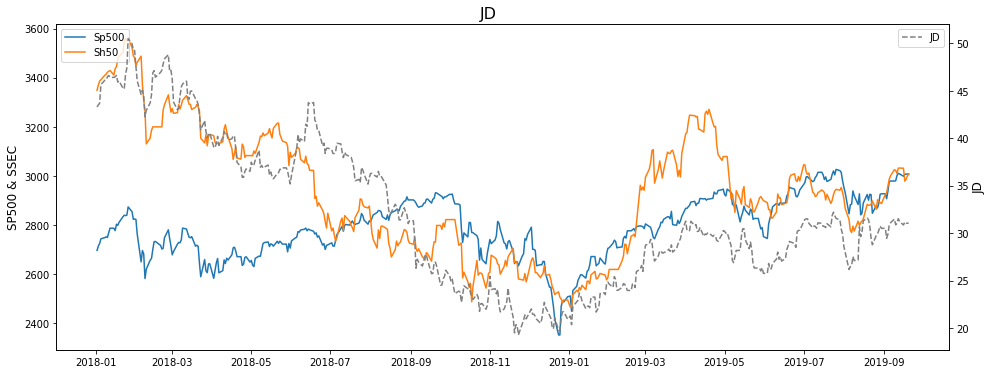

In [23]:
US_Stock = 'JD'
CN_Stock = 'sh'

start = '2018-01-01'
end = '2019-09-20'

US = getUsStock(US_Stock, start, end)
time.sleep(1)
CN = getCnStock(CN_Stock, start, end)

Merged = pd.merge(US, CN, on = 'Date', how = 'outer')
Merged = Merged.sort_values(by='Date')
Merged = Merged.fillna(method = 'ffill')

ticker = US_Stock
drawUsCnStocks(Merged, ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


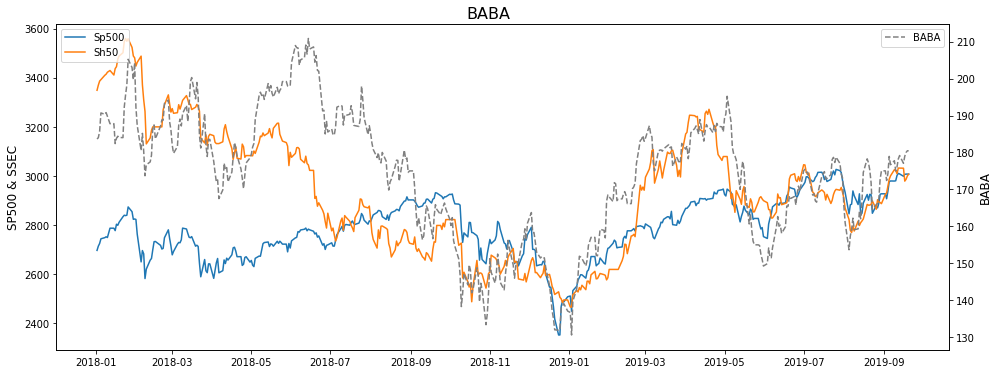

In [25]:
US_Stock = 'BABA'
CN_Stock = 'sh'

start = '2018-01-01'
end = '2019-09-20'

US = getUsStock(US_Stock, start, end)
time.sleep(1)
CN = getCnStock(CN_Stock, start, end)

Merged = pd.merge(US, CN, on = 'Date', how = 'outer')
Merged = Merged.sort_values(by='Date')
Merged = Merged.fillna(method = 'ffill')

ticker = US_Stock
drawUsCnStocks(Merged, ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


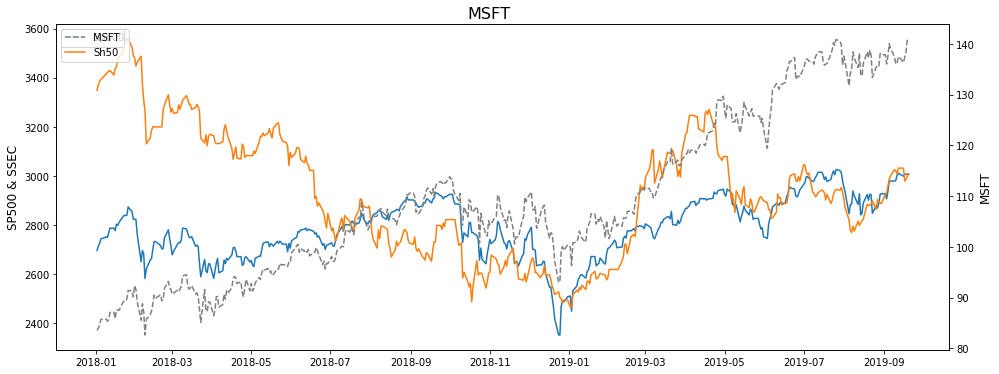

In [26]:
US_Stock = 'MSFT'
CN_Stock = 'sh'

start = '2018-01-01'
end = '2019-09-20'

US = getUsStock(US_Stock, start, end)
time.sleep(1)
CN = getCnStock(CN_Stock, start, end)

Merged = pd.merge(US, CN, on = 'Date', how = 'outer')
Merged = Merged.sort_values(by='Date')
Merged = Merged.fillna(method = 'ffill')

ticker = US_Stock
drawUsCnStocks(Merged, ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


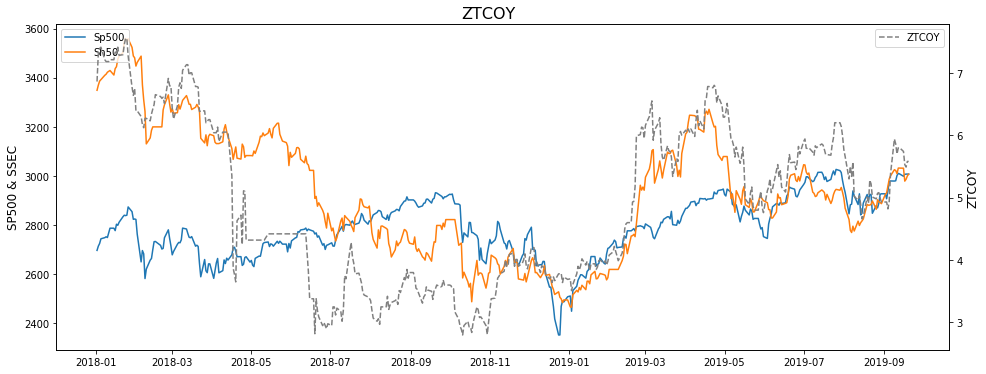

In [29]:
US_Stock = 'ZTCOY'
CN_Stock = 'sh'

start = '2018-01-01'
end = '2019-09-20'

US = getUsStock(US_Stock, start, end)
time.sleep(1)
CN = getCnStock(CN_Stock, start, end)

Merged = pd.merge(US, CN, on = 'Date', how = 'outer')
Merged = Merged.sort_values(by='Date')
Merged = Merged.fillna(method = 'ffill')

ticker = US_Stock
drawUsCnStocks(Merged, ticker)